In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_acc = pd.read_csv('train_accounts.csv')
train_acc.head()

,account,flag
0,a17249,0
1,a03683,1
2,a22146,0
3,a26056,1
4,a13971,0


In [4]:
trans = pd.read_csv('transactions.csv')
trans.head()

,from_account,to_account,transaction_time_utc,value,gas,gas_price
0,a00996,b31499,2020-05-04 14:54:03,0,72585,11500000000
1,a07890,b31500,2020-05-04 14:55:06,0,54426,11349723260
2,a22857,b31501,2020-05-04 14:55:23,0,200000,14024584890
3,a07890,b31502,2020-05-04 14:55:23,108900000000000000,21000,11349723260
4,a21390,b31501,2020-05-04 14:56:05,0,149999,32000000000


In [5]:
train_acc.shape,trans.shape

((25198, 2), (5826604, 6))

In [6]:
acc_array = train_acc['account'].values
acc_array

array(['a17249', 'a03683', 'a22146', ..., 'a08122', 'a27826', 'a09863'],
      dtype=object)

In [7]:
from_tran_array = trans['from_account'].values
print(from_tran_array)
to_tran_array = trans['to_account'].values
print(to_tran_array)

['a00996' 'a07890' 'a22857' ... 'a20151' 'a25907' 'a20151']
['b31499' 'b31500' 'b31501' ... 'b966524' 'b31505' 'b31501']


In [8]:
# check account namne start with 0
acc_id = []
for i in range(len(from_tran_array)):
    if from_tran_array[i][0] == 'a':
        acc_id.append(from_tran_array[i])
    else:
        acc_id.append(to_tran_array[i])
acc_id

['a00996',
 'a07890',
 'a22857',
 'a07890',
 'a21390',
 'a03160',
 'a09308',
 'a25907',
 'a23406',
 'a18090',
 'a17537',
 'a20539',
 'a18462',
 'a18462',
 'a18462',
 'a22206',
 'a29595',
 'a29595',
 'a29595',
 'a29595',
 'a29595',
 'a10178',
 'a10178',
 'a23684',
 'a23684',
 'a29595',
 'a29595',
 'a29595',
 'a29595',
 'a29595',
 'a16528',
 'a18090',
 'a23684',
 'a10775',
 'a21390',
 'a25907',
 'a12326',
 'a28321',
 'a13196',
 'a00383',
 'a02914',
 'a30246',
 'a17914',
 'a31250',
 'a22926',
 'a07890',
 'a07890',
 'a07890',
 'a24553',
 'a24560',
 'a23616',
 'a10789',
 'a01375',
 'a24539',
 'a08821',
 'a28611',
 'a26301',
 'a26301',
 'a24560',
 'a25907',
 'a29397',
 'a04910',
 'a15160',
 'a14878',
 'a12595',
 'a29128',
 'a20891',
 'a12811',
 'a11765',
 'a04526',
 'a21871',
 'a00353',
 'a20191',
 'a24560',
 'a21871',
 'a16983',
 'a13984',
 'a10178',
 'a10178',
 'a06841',
 'a14007',
 'a25339',
 'a15314',
 'a10178',
 'a15217',
 'a24560',
 'a15992',
 'a11386',
 'a22857',
 'a25300',
 'a15217',

In [9]:
# convert to dataframe
acc_id = pd.DataFrame(acc_id,columns=['account'])
acc_id.head()

,account
0,a00996
1,a07890
2,a22857
3,a07890
4,a21390


In [10]:
# add a dataframe to train_acc
trans_acc = pd.concat([trans,acc_id],axis=1)
trans_acc.head()

,from_account,to_account,transaction_time_utc,value,gas,gas_price,account
0,a00996,b31499,2020-05-04 14:54:03,0,72585,11500000000,a00996
1,a07890,b31500,2020-05-04 14:55:06,0,54426,11349723260,a07890
2,a22857,b31501,2020-05-04 14:55:23,0,200000,14024584890,a22857
3,a07890,b31502,2020-05-04 14:55:23,108900000000000000,21000,11349723260,a07890
4,a21390,b31501,2020-05-04 14:56:05,0,149999,32000000000,a21390


In [11]:
trans_acc.drop(['from_account','to_account','transaction_time_utc'],axis=1,inplace=True)

In [12]:
print(trans_acc.isna().sum())
trans_acc.dropna(inplace=True)
trans_acc.head()

value        0
gas          0
gas_price    0
account      0
dtype: int64


,value,gas,gas_price,account
0,0,72585,11500000000,a00996
1,0,54426,11349723260,a07890
2,0,200000,14024584890,a22857
3,108900000000000000,21000,11349723260,a07890
4,0,149999,32000000000,a21390


In [13]:
# trans_acc.to_csv('train.csv',index=False)

In [14]:
# merge train_acc and trans_acc
df = pd.merge(train_acc,trans_acc,on='account',how='left')
print(df.shape)
print(df.isna().sum())

(4674747, 5)
account      0
flag         0
value        5
gas          5
gas_price    5
dtype: int64


In [15]:
df.dropna(inplace=True)
print(df.shape)

(4674742, 5)


<AxesSubplot:ylabel='flag'>

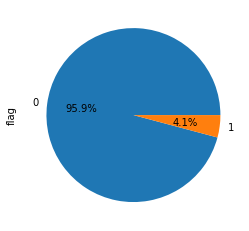

In [16]:
df['flag'].value_counts().plot(kind='pie',autopct='%1.1f%%')


In [17]:
df

,account,flag,value,gas,gas_price
0,a17249,0,36286000000000000,150000.0,3.400000e+10
1,a17249,0,19690880000000000,90000.0,5.300000e+10
2,a17249,0,37382000000000000,47463.0,1.210000e+11
3,a17249,0,435900000000000000,100000.0,1.500000e+09
4,a17249,0,19929000000000000,55638.0,6.750000e+09
...,...,...,...,...,...
4674742,a09863,1,718746100000000000,21000.0,2.100000e+10
4674743,a09863,1,250000000000000000,21000.0,2.300000e+10
4674744,a09863,1,249559000000000000,21000.0,2.100000e+10
4674745,a09863,1,489874000000000000,21000.0,6.000000e+09


In [18]:
df['value'] = df['value'].astype(float)
df['gas_fee'] = df['gas'] * df['gas_price']

In [19]:
nf = df.groupby(['account']).mean()
nf

,flag,value,gas,gas_price,gas_fee
account,,,,,
a00001,0.0,1.916964e+16,73358.818182,5.209091e+10,3.308872e+15
a00002,0.0,3.724191e+16,100129.666667,7.766667e+10,4.954446e+15
a00004,0.0,1.260368e+17,21210.526316,8.664211e+10,1.842474e+15
a00005,0.0,1.101349e+17,27860.465116,1.834833e+10,4.508707e+14
a00006,0.0,1.974414e+16,21000.000000,5.850000e+10,1.228500e+15
...,...,...,...,...,...
a31494,0.0,7.478322e+15,57046.200000,1.401333e+11,8.300728e+15
a31495,0.0,4.148571e+14,48857.142857,1.227286e+10,6.015429e+14
a31496,0.0,1.134590e+17,47453.971223,8.058993e+09,4.055729e+14


<AxesSubplot:>

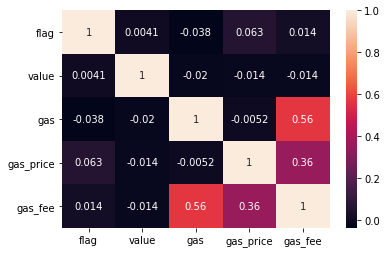

In [20]:
m1 = nf.corr()
sns.heatmap(m1,annot=True)

In [21]:
# Lets start the model building
x = nf.drop(['flag'],axis=1)    # independent variable
y = nf['flag']     
x.shape,y.shape 

((25193, 4), (25193,))

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Random Forest Classifier

0.902758483826156
[[4489   61]
 [ 429   60]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      4550
         1.0       0.50      0.12      0.20       489

    accuracy                           0.90      5039
   macro avg       0.70      0.55      0.57      5039
weighted avg       0.87      0.90      0.88      5039



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


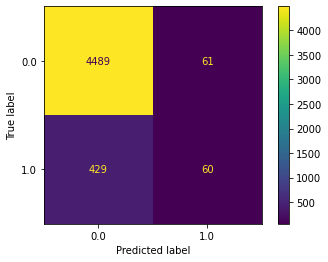

In [31]:
from matplotlib.pyplot import plot
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
pred_rf = model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
print(accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))
print(plot_confusion_matrix(model,x_test,y_test))
print(classification_report(y_test,pred_rf))

lightGBM Classifier

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[20]	training's binary_logloss: 0.252277	valid_0's binary_logloss: 0.267585
[40]	training's binary_logloss: 0.236885	valid_0's binary_logloss: 0.264309
[60]	training's binary_logloss: 0.226552	valid_0's binary_logloss: 0.263992
[80]	training's binary_logloss: 0.217624	valid_0's binary_logloss: 0.263954
[100]	training's binary_logloss: 0.210745	valid_0's binary_logloss: 0.264733
0.9047430045643977
[[4536   14]
 [ 466   23]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      4550
         1.0       0.62      0.05      0.09       489

    accuracy                           0.90      5039
   macro avg       0.76      0.52      0.52      5039
weighted avg       0.88      0.90      0.87      5039



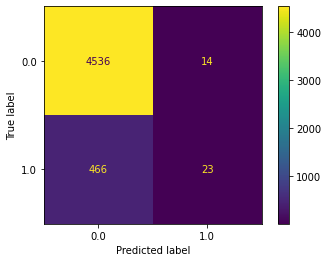

In [32]:
import lightgbm as lgb
model1 = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model1.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')
pred_lgb = model1.predict(x_test)
print(accuracy_score(y_test,pred_lgb))
print(confusion_matrix(y_test,pred_lgb))
print(plot_confusion_matrix(model1,x_test,y_test))
print(classification_report(y_test,pred_lgb))

XGBoost Classifier

0.9029569358999802
[[4496   54]
 [ 435   54]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      4550
         1.0       0.50      0.11      0.18       489

    accuracy                           0.90      5039
   macro avg       0.71      0.55      0.56      5039
weighted avg       0.87      0.90      0.87      5039



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


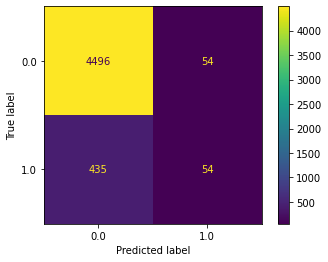

In [33]:
# Xgboost
import xgboost as xgb
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_train,y_train)
preds_xgb = xgb_c.predict(x_test)
print(accuracy_score(y_test,preds_xgb))
print(confusion_matrix(y_test,preds_xgb))
print(plot_confusion_matrix(xgb_c,x_test,y_test))
print(classification_report(y_test,preds_xgb))

KNN Classifier

In [34]:
# knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
preds_knn = knn.predict(x_test)
preds_knn

array([0., 0., 0., ..., 0., 0., 0.])

0.8888668386584639
[[4443  107]
 [ 453   36]]


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      4550
         1.0       0.25      0.07      0.11       489

    accuracy                           0.89      5039
   macro avg       0.58      0.53      0.53      5039
weighted avg       0.84      0.89      0.86      5039



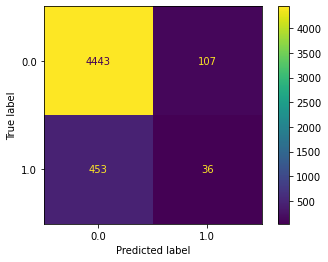

In [35]:
print(accuracy_score(y_test,preds_knn))
print(confusion_matrix(y_test,preds_knn))
print(plot_confusion_matrix(knn,x_test,y_test))
print(classification_report(y_test,preds_knn))

CatBoost Classifier

Learning rate set to 0.037145
0:	learn: 0.6555285	total: 147ms	remaining: 2m 26s
1:	learn: 0.6199949	total: 154ms	remaining: 1m 16s
2:	learn: 0.5867963	total: 160ms	remaining: 53s
3:	learn: 0.5574326	total: 168ms	remaining: 41.9s
4:	learn: 0.5306691	total: 176ms	remaining: 35.1s
5:	learn: 0.5059603	total: 184ms	remaining: 30.4s
6:	learn: 0.4838716	total: 191ms	remaining: 27.1s
7:	learn: 0.4644183	total: 199ms	remaining: 24.7s
8:	learn: 0.4469033	total: 208ms	remaining: 22.9s
9:	learn: 0.4299637	total: 216ms	remaining: 21.4s
10:	learn: 0.4158510	total: 225ms	remaining: 20.3s
11:	learn: 0.4035755	total: 235ms	remaining: 19.4s
12:	learn: 0.3926677	total: 242ms	remaining: 18.3s
13:	learn: 0.3821796	total: 252ms	remaining: 17.8s
14:	learn: 0.3729102	total: 258ms	remaining: 16.9s
15:	learn: 0.3638970	total: 269ms	remaining: 16.5s
16:	learn: 0.3561309	total: 276ms	remaining: 16s
17:	learn: 0.3484416	total: 284ms	remaining: 15.5s
18:	learn: 0.3411047	total: 290ms	remaining: 15s
19:	learn: 0.33

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


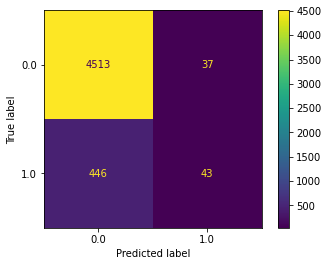

In [36]:
# Catboost classifier
from catboost import CatBoostClassifier
cat = CatBoostClassifier(random_state=42)
cat.fit(x_train,y_train)
preds_cat = cat.predict(x_test)
print(accuracy_score(y_test,preds_cat))
print(classification_report(y_test, preds_cat))
plot_confusion_matrix(cat,x_test, y_test)

0.9041476483429252
[[4513   37]
 [ 446   43]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      4550
         1.0       0.54      0.09      0.15       489

    accuracy                           0.90      5039
   macro avg       0.72      0.54      0.55      5039
weighted avg       0.87      0.90      0.87      5039



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


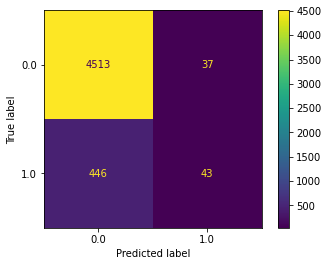

In [37]:
print(accuracy_score(y_test,preds_cat))
print(confusion_matrix(y_test,preds_cat))
print(plot_confusion_matrix(cat,x_test,y_test))
print(classification_report(y_test,preds_cat))

# Applying SMOTEENN to the dataset

In [26]:
# apply ALLKNN algorithm to the dataset
from imblearn.combine import SMOTEENN,SMOTETomek
smote_enn = SMOTEENN(random_state=42)
x_resampled,y_resampled = smote_enn.fit_resample(x,y)
x_resampled.shape,y_resampled.shape

((25748, 4), (25748,))

In [27]:
# split the data into train and test
x1_train,x1_test,y1_train,y1_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

Oversampling with random forest

0.9133980582524271
              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      2552
         1.0       0.89      0.95      0.92      2598

    accuracy                           0.91      5150
   macro avg       0.92      0.91      0.91      5150
weighted avg       0.92      0.91      0.91      5150



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


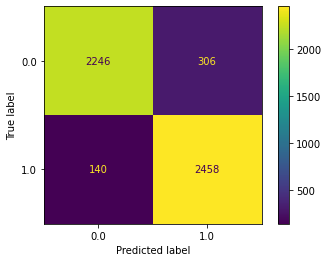

In [40]:
# use RF classifier
model.fit(x1_train,y1_train)
preds_rf = model.predict(x1_test)
print(accuracy_score(y1_test,preds_rf))
print(classification_report(y1_test, preds_rf))
plot_confusion_matrix(model,x1_test, y1_test)

OverSampling with CatBoost

Learning rate set to 0.037492
0:	learn: 0.6706033	total: 8.2ms	remaining: 8.19s
1:	learn: 0.6493280	total: 16.1ms	remaining: 8.04s
2:	learn: 0.6306675	total: 23ms	remaining: 7.65s
3:	learn: 0.6127827	total: 30ms	remaining: 7.46s
4:	learn: 0.5964707	total: 37.4ms	remaining: 7.43s
5:	learn: 0.5818116	total: 44ms	remaining: 7.29s
6:	learn: 0.5688705	total: 52.2ms	remaining: 7.41s
7:	learn: 0.5559573	total: 59.2ms	remaining: 7.34s
8:	learn: 0.5438057	total: 67.2ms	remaining: 7.39s
9:	learn: 0.5322692	total: 74ms	remaining: 7.32s
10:	learn: 0.5229823	total: 80.9ms	remaining: 7.28s
11:	learn: 0.5138165	total: 89.3ms	remaining: 7.36s
12:	learn: 0.5057951	total: 96.5ms	remaining: 7.33s
13:	learn: 0.4980643	total: 104ms	remaining: 7.32s
14:	learn: 0.4901172	total: 112ms	remaining: 7.36s
15:	learn: 0.4835192	total: 119ms	remaining: 7.34s
16:	learn: 0.4774542	total: 126ms	remaining: 7.27s
17:	learn: 0.4715483	total: 132ms	remaining: 7.22s
18:	learn: 0.4661135	total: 139ms	remaining: 7.19s
19:	lea

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


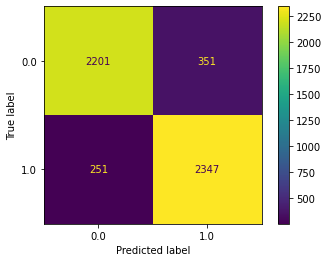

In [41]:
# Catboost classifier
from catboost import CatBoostClassifier
cat1 = CatBoostClassifier(random_state=42)
cat1.fit(x1_train,y1_train)
preds_cat1 = cat1.predict(x1_test)
print(accuracy_score(y1_test,preds_cat1))
print(classification_report(y1_test, preds_cat1))
plot_confusion_matrix(cat1,x1_test, y1_test)

In [42]:
print(accuracy_score(y1_test,preds_cat1))
print(confusion_matrix(y1_test,preds_cat1))
# print(plot_confusion_matrix(cat1,x1_test,y1_test))
print(classification_report(y1_test,preds_cat1))

0.8831067961165049
[[2201  351]
 [ 251 2347]]
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      2552
         1.0       0.87      0.90      0.89      2598

    accuracy                           0.88      5150
   macro avg       0.88      0.88      0.88      5150
weighted avg       0.88      0.88      0.88      5150



OverSampling with XGBoost

0.9104854368932039
[[2266  286]
 [ 175 2423]]
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      2552
         1.0       0.89      0.93      0.91      2598

    accuracy                           0.91      5150
   macro avg       0.91      0.91      0.91      5150
weighted avg       0.91      0.91      0.91      5150



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


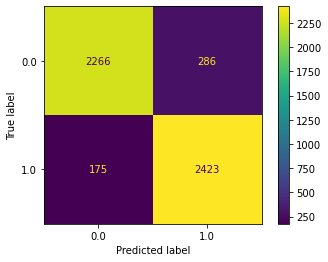

In [43]:
# Xgboost
import xgboost as xgb
xgb_c1 = xgb.XGBClassifier(random_state=42)
xgb_c1.fit(x1_train,y1_train)
preds_xgb1 = xgb_c1.predict(x1_test)
print(accuracy_score(y1_test,preds_xgb1))
print(confusion_matrix(y1_test,preds_xgb1))
print(plot_confusion_matrix(xgb_c1,x1_test,y1_test))
print(classification_report(y1_test,preds_xgb1))


OverSampling with lightGBM

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.363145	valid_0's binary_logloss: 0.372792
[40]	training's binary_logloss: 0.311444	valid_0's binary_logloss: 0.327697
[60]	training's binary_logloss: 0.284939	valid_0's binary_logloss: 0.30894
[80]	training's binary_logloss: 0.267825	valid_0's binary_logloss: 0.296958
[100]	training's binary_logloss: 0.255765	valid_0's binary_logloss: 0.290154
0.8784466019417476
[[2188  364]
 [ 262 2336]]
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      2552
         1.0       0.87      0.90      0.88      2598

    accuracy                           0.88      5150
   macro avg       0.88      0.88      0.88      5150
weighted avg       0.88      0.88      0.88      5150



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


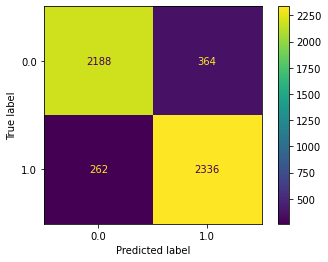

In [44]:
import lightgbm as lgb
model11 = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model11.fit(x1_train,y1_train,eval_set=[(x1_test,y1_test),(x1_train,y1_train)],verbose=20,eval_metric='logloss')
pred_lgb1 = model11.predict(x1_test)
print(accuracy_score(y1_test,pred_lgb1))
print(confusion_matrix(y1_test,pred_lgb1))
print(plot_confusion_matrix(model11,x1_test,y1_test))
print(classification_report(y1_test,pred_lgb1))

OverSampling with KNN

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

0.9526213592233009
[[2378  174]
 [  70 2528]]
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      2552
         1.0       0.94      0.97      0.95      2598

    accuracy                           0.95      5150
   macro avg       0.95      0.95      0.95      5150
weighted avg       0.95      0.95      0.95      5150



c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


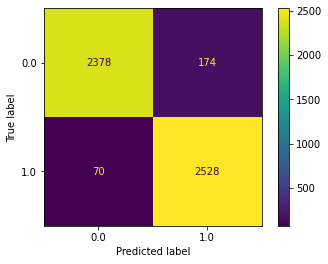

In [30]:
# knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(x1_train,y1_train)
preds_knn1 = knn1.predict(x1_test)
print(accuracy_score(y1_test,preds_knn1))
print(confusion_matrix(y1_test,preds_knn1))
print(plot_confusion_matrix(knn1,x1_test,y1_test))
print(classification_report(y1_test ,preds_knn1))


In [49]:
# save the model
import pickle
pickle.dump(knn1,open('knn1.pkl','wb'))

Using ALLKNN under-sampling

In [34]:
# over sampling using ALLKNN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import AllKNN
print('Original dataset shape %s' % Counter(y))
x_res,y_res = AllKNN().fit_resample(x,y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0.0: 22742, 1.0: 2451})
Resampled dataset shape Counter({0.0: 16490, 1.0: 2451})


In [35]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [36]:
# catboost classifier
from catboost import CatBoostClassifier
cat2 = CatBoostClassifier(random_state=42)
cat2.fit(x2_train,y2_train)
preds_cat2 = cat2.predict(x2_test)

Learning rate set to 0.032885
0:	learn: 0.6589857	total: 159ms	remaining: 2m 38s
1:	learn: 0.6282976	total: 173ms	remaining: 1m 26s
2:	learn: 0.5997272	total: 183ms	remaining: 1m
3:	learn: 0.5761448	total: 190ms	remaining: 47.4s
4:	learn: 0.5523178	total: 202ms	remaining: 40.2s
5:	learn: 0.5297972	total: 209ms	remaining: 34.6s
6:	learn: 0.5103308	total: 221ms	remaining: 31.3s
7:	learn: 0.4927945	total: 229ms	remaining: 28.3s
8:	learn: 0.4760484	total: 238ms	remaining: 26.2s
9:	learn: 0.4611717	total: 250ms	remaining: 24.7s
10:	learn: 0.4471258	total: 257ms	remaining: 23.1s
11:	learn: 0.4339579	total: 268ms	remaining: 22.1s
12:	learn: 0.4217939	total: 273ms	remaining: 20.8s
13:	learn: 0.4105487	total: 285ms	remaining: 20.1s
14:	learn: 0.4000546	total: 292ms	remaining: 19.2s
15:	learn: 0.3921916	total: 302ms	remaining: 18.6s
16:	learn: 0.3840951	total: 307ms	remaining: 17.8s
17:	learn: 0.3766423	total: 318ms	remaining: 17.4s
18:	learn: 0.3696269	total: 323ms	remaining: 16.7s
19:	learn: 0

0.8886249670097651
[[3195  105]
 [ 317  172]]


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      3300
         1.0       0.62      0.35      0.45       489

    accuracy                           0.89      3789
   macro avg       0.77      0.66      0.69      3789
weighted avg       0.87      0.89      0.87      3789



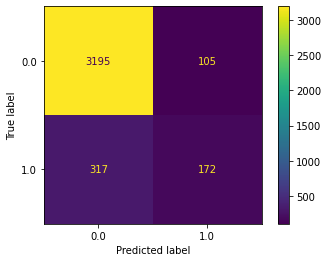

In [37]:
print(accuracy_score(y2_test,preds_cat2))
print(confusion_matrix(y2_test,preds_cat2))
print(plot_confusion_matrix(cat2,x2_test,y2_test))
print(classification_report(y2_test,preds_cat2))

KNN + ALLKNN

0.9065716547901821
[[3237   63]
 [ 291  198]]


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      3300
         1.0       0.76      0.40      0.53       489

    accuracy                           0.91      3789
   macro avg       0.84      0.69      0.74      3789
weighted avg       0.90      0.91      0.89      3789



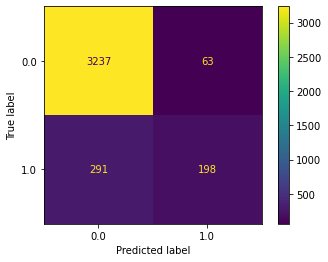

In [38]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x2_train,y2_train)
preds_knn2 = knn2.predict(x2_test)
print(accuracy_score(y2_test,preds_knn2))
print(confusion_matrix(y2_test,preds_knn2))
print(plot_confusion_matrix(knn2,x2_test,y2_test))
print(classification_report(y2_test,preds_knn2))